## Mod 5 Lecture 3 Code-Along:  Data Transformations 

### Goals
* Apply a log-transformation on a continous numeric variable 
* Be able to articulate the difference between "non-logged" and log variables 

### Data
Using the same NYC 311 dataset (remember the data is HUGE so we extracted just a week).  Data information exists [HERE](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Read in data nyc311.csv 

df = pd.read_csv("/Users/Marcy_Student/Desktop/Marcy_Lab/DA2025_Lectures/Mod5/DataChallenges/data/nyc311.csv")

In [11]:
#Run this cell without changes!  You've done this in the previous code

LOCAL_TZ = "America/New_York"

def to_utc(series, local_tz=LOCAL_TZ):
    """
    Idempotent conversion:
      1) Parse to datetime.
      2) If naive -> localize to local_tz (handle DST).
      3) Convert to UTC.
    Safe to re-run without raising 'Already tz-aware' errors.
    """
    s = pd.to_datetime(series, errors="coerce")

    # if tz-naive, localize; if tz-aware, leave as-is
    if s.dt.tz is None:
        s = s.dt.tz_localize(local_tz, nonexistent="shift_forward", ambiguous="NaT")

    return s.dt.tz_convert("UTC")

# --- Apply to your DataFrame (df) ---
# Ensure the columns exist; adjust names if your file uses different headers
required_cols = ["Created Date", "Closed Date"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing expected columns: {missing}")

# Optionally drop rows that lack either timestamp before conversion
df = df.dropna(subset=["Created Date", "Closed Date"]).copy()

df["Created Date"] = to_utc(df["Created Date"])
df["Closed Date"]  = to_utc(df["Closed Date"])

# Compute response time in hours
delta = df["Closed Date"] - df["Created Date"]
df["response_time_hrs"] = delta.dt.total_seconds() / 3600

# Drop any rows that became NaT due to ambiguous DST cases
df = df.dropna(subset=["Created Date", "Closed Date"])

### Task 1:  Visualize the "response time" BEFORE LOGGING 

<Axes: >

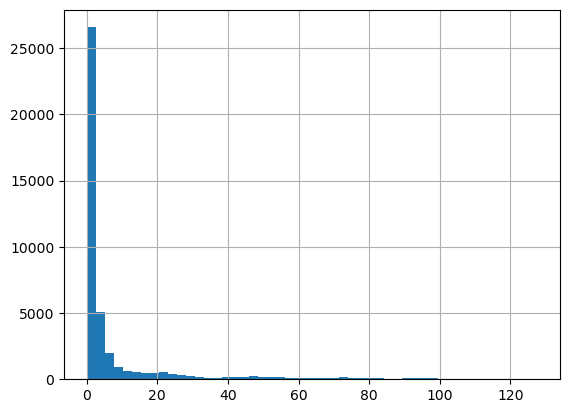

In [12]:
# Assume df already loaded with tz-aware dates and response_time_hrs
df["response_time_hrs"] = df['response_time_hrs'].clip(lower=0.01) # avoid log(0)

# Quick look at original distribution
df['response_time_hrs'].hist(bins=50)

### Task 2:  Apply a log transformation 

In [18]:
df["log_response_time"] = np.log1p(df['response_time_hrs'])
df[["response_time_hrs", "log_response_time"]].describe()

,response_time_hrs,log_response_time
count,41348.000000,41348.000000
mean,8.015254,1.273887
std,17.837423,1.151379
min,0.010000,0.009950
25%,0.542222,0.433224
50%,1.398611,0.874890
75%,4.626042,1.727406
max,127.672222,4.857268


### Task 3:  Visualize the Difference 

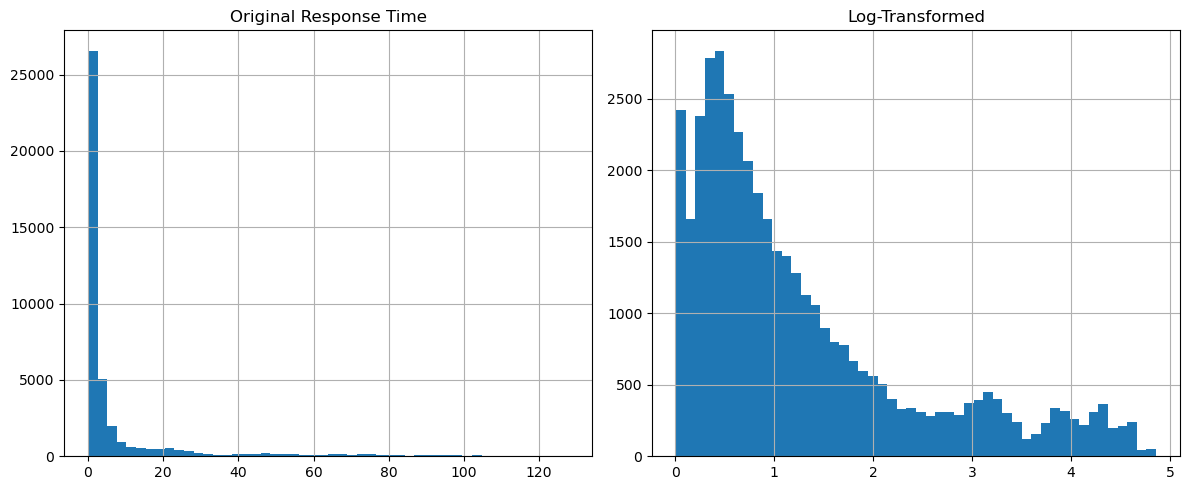

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
df['response_time_hrs'].hist(bins=50)
plt.title("Original Response Time")

plt.subplot(1, 2, 2)
df['log_response_time'].hist(bins=50)
plt.title("Log-Transformed")

plt.tight_layout()
plt.show()
